## THE BASICS - Importing, train/test split

In [46]:
import numpy as np
import pandas as pd

In [47]:
main_df = pd.read_csv('data/df', index_col=0)

In [48]:
main_df

,tweet,product,emotion,brand,emotion_label,length,exclamation,hashtag,mention,sentiment,clean_tweet,tokens,tokens_no_brands,tokens_sparse
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative,Apple,0,127,True,"['#RISE_Austin', '#SXSW']",['wesley83'],True,mention i have a 3g iphone after 3 hrs twee...,"['mention', '3g', 'iphone', '3', 'hrs', 'tweet...","['mention', '3g', '3', 'hrs', 'tweeting', 'ris...","['3g', 'hrs', 'tweeting', 'rise_austin', 'dead..."
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive,Apple,2,139,False,['#SXSW'],"['jessedee', 'fludapp']",True,mention know about mention awesome ipad ip...,"['mention', 'know', 'mention', 'awesome', 'ipa...","['mention', 'know', 'mention', 'awesome', 'app...","['know', 'awesome', 'likely', 'appreciate', 'd..."
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive,Apple,2,79,False,"['#iPad', '#SXSW']",['swonderlin'],True,mention can not wait for ipad 2 also they s...,"['mention', 'wait', 'ipad', '2', 'also', 'sale...","['mention', 'wait', '2', 'also', 'sale', 'sxsw']","['wait', 'also', 'sale']"
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative,Apple,0,82,False,['#sxsw'],['sxsw'],True,mention i hope this year s festival isn t as ...,"['mention', 'hope', 'year', 'festival', 'crash...","['mention', 'hope', 'year', 'festival', 'crash...","['hope', 'year', 'festival', 'crashy', 'year']"
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive,Google,2,131,False,['#SXSW'],['sxtxstate'],True,mention great stuff on fri sxsw marissa may...,"['mention', 'great', 'stuff', 'fri', 'sxsw', '...","['mention', 'great', 'stuff', 'fri', 'sxsw', '...","['great', 'stuff', 'fri', 'marissa', 'mayer', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive,Apple,2,29,False,['#SXSW'],[],True,ipad everywhere sxsw link,"['ipad', 'everywhere', 'sxsw', 'link']","['everywhere', 'sxsw', 'link']",['everywhere']
9089,"Wave, buzz... RT @mention We interrupt your re...",None,None,NaN,1,125,False,"['#sxsw', '#google', '#circles']",['mention'],False,wave buzz rt mention we interrupt your re...,"['wave', 'buzz', 'rt', 'mention', 'interrupt',...","['wave', 'buzz', 'rt', 'mention', 'interrupt',...","['wave', 'buzz', 'interrupt', 'regularly', 'sc..."
9090,"Google's Zeiger, a physician never reported po...",None,None,NaN,1,145,False,"['#sxsw', '#health2dev']",[],False,google s zeiger a physician never reported po...,"['google', 'zeiger', 'physician', 'never', 're...","['zeiger', 'physician', 'never', 'reported', '...","['zeiger', 'physician', 'never', 'reported', '..."
9091,Some Verizon iPhone customers complained their...,None,None,NaN,1,140,False,['#SXSW'],[],False,some verizon iphone customers complained their...,"['verizon', 'iphone', 'customers', 'complained...","['verizon', 'customers', 'complained', 'time',...","['verizon', 'customers', 'complained', 'time',..."


In [49]:
# convert lists back into form from strings after import (because import treats list as strings)


import ast
main_df['tokens'] =[ast.literal_eval(x) for x in main_df['tokens'] ]
main_df['tokens_sparse'] =[ast.literal_eval(x) for x in main_df['tokens_sparse'] ]
main_df['tokens_no_brands'] =[ast.literal_eval(x) for x in main_df['tokens_no_brands'] ]

In [50]:
main_df['sparse_joined'] = main_df['tokens_sparse'].apply(lambda x: " ".join(x))
main_df['tokens_joined'] = main_df['tokens'].apply(lambda x: " ".join(x))
main_df['no_brand_joined'] = main_df['tokens_no_brands'].apply(lambda x: " ".join(x))

In [51]:
type(main_df['tokens'].iloc[0])

list

In [52]:
main_df


,tweet,product,emotion,brand,emotion_label,length,exclamation,hashtag,mention,sentiment,clean_tweet,tokens,tokens_no_brands,tokens_sparse,sparse_joined,tokens_joined,no_brand_joined
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative,Apple,0,127,True,"['#RISE_Austin', '#SXSW']",['wesley83'],True,mention i have a 3g iphone after 3 hrs twee...,"[mention, 3g, iphone, 3, hrs, tweeting, rise_a...","[mention, 3g, 3, hrs, tweeting, rise_austin, d...","[3g, hrs, tweeting, rise_austin, dead, need, u...",3g hrs tweeting rise_austin dead need upgrade ...,mention 3g iphone 3 hrs tweeting rise_austin d...,mention 3g 3 hrs tweeting rise_austin dead nee...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive,Apple,2,139,False,['#SXSW'],"['jessedee', 'fludapp']",True,mention know about mention awesome ipad ip...,"[mention, know, mention, awesome, ipad, iphone...","[mention, know, mention, awesome, app, likely,...","[know, awesome, likely, appreciate, design, al...",know awesome likely appreciate design also giv...,mention know mention awesome ipad iphone app l...,mention know mention awesome app likely apprec...
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive,Apple,2,79,False,"['#iPad', '#SXSW']",['swonderlin'],True,mention can not wait for ipad 2 also they s...,"[mention, wait, ipad, 2, also, sale, sxsw]","[mention, wait, 2, also, sale, sxsw]","[wait, also, sale]",wait also sale,mention wait ipad 2 also sale sxsw,mention wait 2 also sale sxsw
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative,Apple,0,82,False,['#sxsw'],['sxsw'],True,mention i hope this year s festival isn t as ...,"[mention, hope, year, festival, crashy, year, ...","[mention, hope, year, festival, crashy, year, ...","[hope, year, festival, crashy, year]",hope year festival crashy year,mention hope year festival crashy year iphone ...,mention hope year festival crashy year app men...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive,Google,2,131,False,['#SXSW'],['sxtxstate'],True,mention great stuff on fri sxsw marissa may...,"[mention, great, stuff, fri, sxsw, marissa, ma...","[mention, great, stuff, fri, sxsw, marissa, ma...","[great, stuff, fri, marissa, mayer, tim, reill...",great stuff fri marissa mayer tim reilly tech ...,mention great stuff fri sxsw marissa mayer goo...,mention great stuff fri sxsw marissa mayer tim...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive,Apple,2,29,False,['#SXSW'],[],True,ipad everywhere sxsw link,"[ipad, everywhere, sxsw, link]","[everywhere, sxsw, link]",[everywhere],everywhere,ipad everywhere sxsw link,everywhere sxsw link
9089,"Wave, buzz... RT @mention We interrupt your re...",None,None,NaN,1,125,False,"['#sxsw', '#google', '#circles']",['mention'],False,wave buzz rt mention we interrupt your re...,"[wave, buzz, rt, mention, interrupt, regularly...","[wave, buzz, rt, mention, interrupt, regularly...","[wave, buzz, interrupt, regularly, scheduled, ...",wave buzz interrupt regularly scheduled geek p...,wave buzz rt mention interrupt regularly sched...,wave buzz rt mention interrupt regularly sched...
9090,"Google's Zeiger, a physician never reported po...",None,None,NaN,1,145,False,"['#sxsw', '#health2dev']",[],False,google s zeiger a physician never reported po...,"[google, zeiger, physician, never, reported, p...","[zeiger, physician, never, reported, potential...","[zeiger, physician, never, reported, potential...",zeiger physician never reported potential ae y...,google zeiger physician never reported potenti...,zeiger physician never reported potential ae y...
9091,Some Verizon iPhone customers complained their...,None,None,NaN,1,140,False,['#SXSW'],[],False,some verizon iphone customers complained their...,"[verizon, iphone, customers, complained, time,...","[verizon, customers, complained, time, fell, b...","[verizon, customers, complained, time, fell, 

In [53]:
#string of sparse

sparse_string = ''

for tweet in main_df['sparse_joined']:
    sparse_string += ' '+tweet

sparse_string

' 3g hrs tweeting rise_austin dead need upgrade plugin stations know awesome likely appreciate design also giving free ts wait also sale hope year festival crashy year great stuff fri marissa mayer tim reilly tech books conferences matt mullenweg wordpress apps speechtherapy communication showcased conference http ht ly 49n4m iear edchat asd starting ctia around corner googleio hop skip jump good time fan beautifully smart simple idea wrote hollergram http bit ly ieavob counting days plus strong canadian dollar means stock gear excited meet show sprint galaxy still running fail find start impromptu parties http bit ly gvlrin wait til comes foursquare ups game time http j mp grn7pk still prefer far best looking date gotta love calendar featuring top parties show cases check via gt http bit ly axzwxb great http tinyurl com 4nqv92l haha awesomely rad http bit ly htdfim hollergram holler gram itunes http co kfn3f5q via noticed dst coming weekend many users hour late come sunday morning add

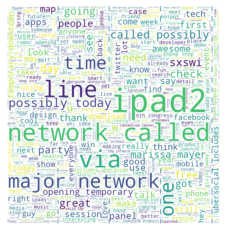

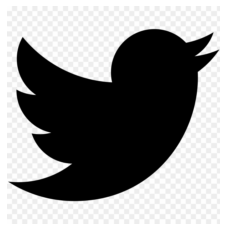

In [57]:
from os import path
from PIL import Image
import matplotlib.pyplot as plt
import os

from wordcloud import WordCloud, STOPWORDS



# Read the whole text.
text = sparse_string

# read the mask image
# taken from
# http://www.stencilry.org/stencils/movies/alice%20in%20wonderland/255fk.jpg
twitter_mask = np.array(Image.open('twitter_mask.png'))

stopwords = set(STOPWORDS)
stopwords.add("said")

wc = WordCloud(background_color="white", max_words=2000, mask=twitter_mask,
               contour_width=3, contour_color='steelblue')

# generate word cloud
wc.generate(text)

# # store to file
# wc.to_file(path.join(d, "alice.png"))

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(twitter_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()